In [7]:
import pandas as pd


In [9]:
pip install PyPDF2

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [13]:
import pandas as pd

# Read the TSV file
file_path = r'C:\Users\jacob\OneDrive\Documents\IntroAI\project2\AAI_501_Project-1\eda\drugLibTest_raw.tsv'
df = pd.read_csv(file_path, sep='\t')

# Display the first few rows
print(df.head())

# Get basic information about the DataFrame
print(df.info())

   Unnamed: 0 urlDrugName  rating           effectiveness  \
0        1366      biaxin       9  Considerably Effective   
1        3724    lamictal       9        Highly Effective   
2        3824    depakene       4    Moderately Effective   
3         969     sarafem      10        Highly Effective   
4         696    accutane      10        Highly Effective   

           sideEffects           condition  \
0    Mild Side Effects     sinus infection   
1    Mild Side Effects    bipolar disorder   
2  Severe Side Effects    bipolar disorder   
3      No Side Effects  bi-polar / anxiety   
4    Mild Side Effects        nodular acne   

                                      benefitsReview  \
0  The antibiotic may have destroyed bacteria cau...   
1  Lamictal stabilized my serious mood swings. On...   
2  Initial benefits were comparable to the brand ...   
3  It controlls my mood swings. It helps me think...   
4  Within one week of treatment superficial acne ...   

                   

In [14]:
import pandas as pd

# Read the TSV file
file_path = r'C:\Users\jacob\OneDrive\Documents\IntroAI\project2\AAI_501_Project-1\eda\drugLibTrain_raw.tsv'
df2 = pd.read_csv(file_path, sep='\t')

# Display the first few rows
print(df.head())

# Get basic information about the DataFrame
print(df.info())

   Unnamed: 0 urlDrugName  rating           effectiveness  \
0        1366      biaxin       9  Considerably Effective   
1        3724    lamictal       9        Highly Effective   
2        3824    depakene       4    Moderately Effective   
3         969     sarafem      10        Highly Effective   
4         696    accutane      10        Highly Effective   

           sideEffects           condition  \
0    Mild Side Effects     sinus infection   
1    Mild Side Effects    bipolar disorder   
2  Severe Side Effects    bipolar disorder   
3      No Side Effects  bi-polar / anxiety   
4    Mild Side Effects        nodular acne   

                                      benefitsReview  \
0  The antibiotic may have destroyed bacteria cau...   
1  Lamictal stabilized my serious mood swings. On...   
2  Initial benefits were comparable to the brand ...   
3  It controlls my mood swings. It helps me think...   
4  Within one week of treatment superficial acne ...   

                   

In [15]:
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install wordcloud


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import Counter
from wordcloud import WordCloud

# Set style for better visualizations
plt.style.use('seaborn-v0_8')  # or you can use 'seaborn-darkgrid'
sns.set_theme()  # This will set the seaborn theme

In [18]:
# Combine train and test data for complete analysis
df_combined = pd.concat([df, df2], ignore_index=True)

# Basic Information about the dataset
print("Dataset Shape:", df_combined.shape)
print("\nColumns:", df_combined.columns.tolist())
print("\nMissing Values:\n", df_combined.isnull().sum())
print("\nData Types:\n", df_combined.dtypes)

Dataset Shape: (4143, 9)

Columns: ['Unnamed: 0', 'urlDrugName', 'rating', 'effectiveness', 'sideEffects', 'condition', 'benefitsReview', 'sideEffectsReview', 'commentsReview']

Missing Values:
 Unnamed: 0            0
urlDrugName           0
rating                0
effectiveness         0
sideEffects           0
condition             1
benefitsReview       23
sideEffectsReview    98
commentsReview       13
dtype: int64

Data Types:
 Unnamed: 0            int64
urlDrugName          object
rating                int64
effectiveness        object
sideEffects          object
condition            object
benefitsReview       object
sideEffectsReview    object
commentsReview       object
dtype: object


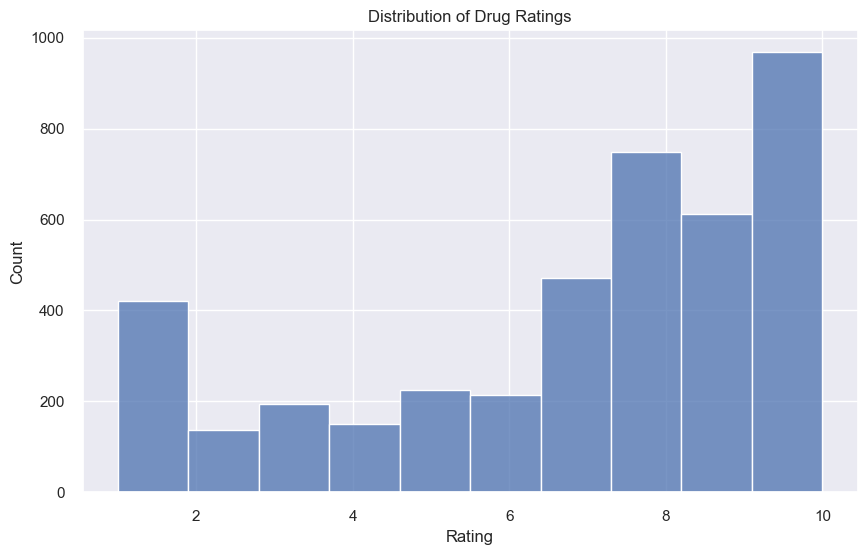

In [19]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df_combined, x='rating', bins=10)
plt.title('Distribution of Drug Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

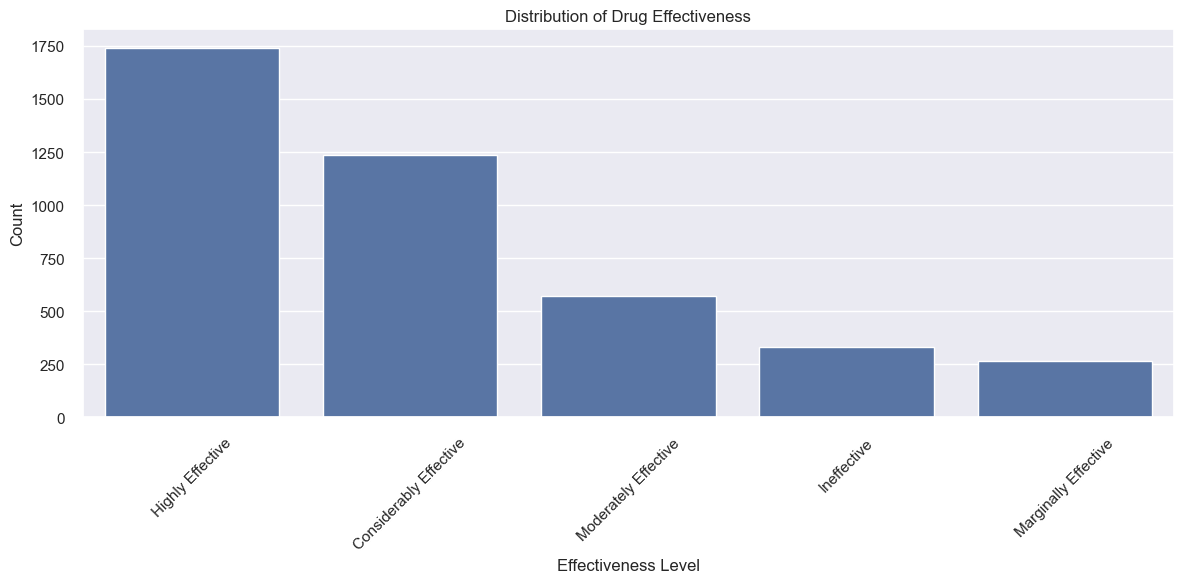

In [20]:
plt.figure(figsize=(12, 6))
effectiveness_counts = df_combined['effectiveness'].value_counts()
sns.barplot(x=effectiveness_counts.index, y=effectiveness_counts.values)
plt.xticks(rotation=45)
plt.title('Distribution of Drug Effectiveness')
plt.xlabel('Effectiveness Level')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

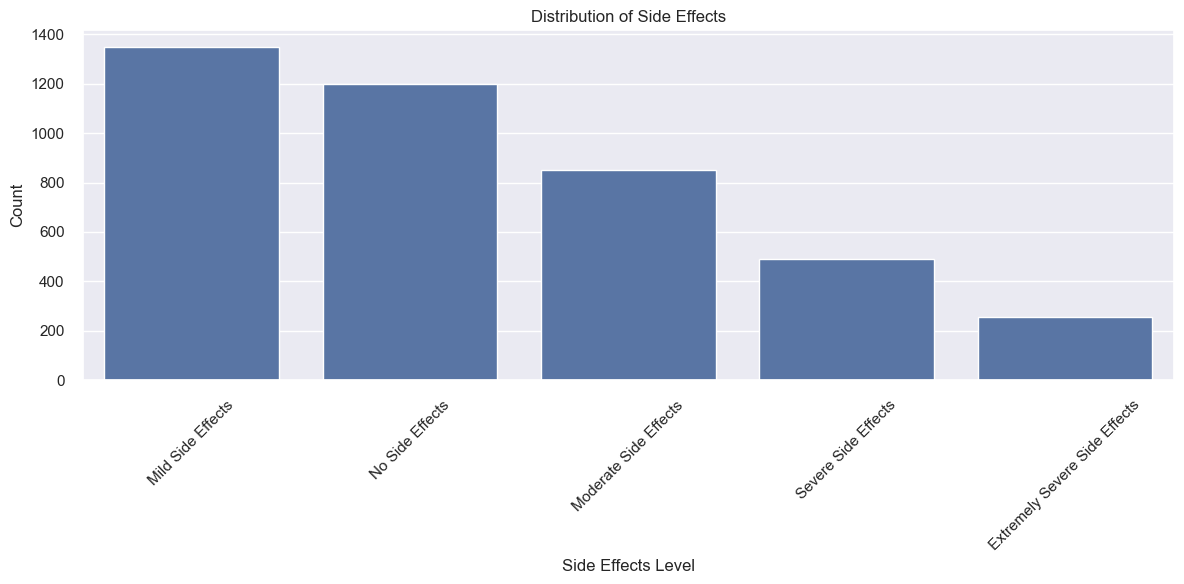

In [21]:
plt.figure(figsize=(12, 6))
side_effects_counts = df_combined['sideEffects'].value_counts()
sns.barplot(x=side_effects_counts.index, y=side_effects_counts.values)
plt.xticks(rotation=45)
plt.title('Distribution of Side Effects')
plt.xlabel('Side Effects Level')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

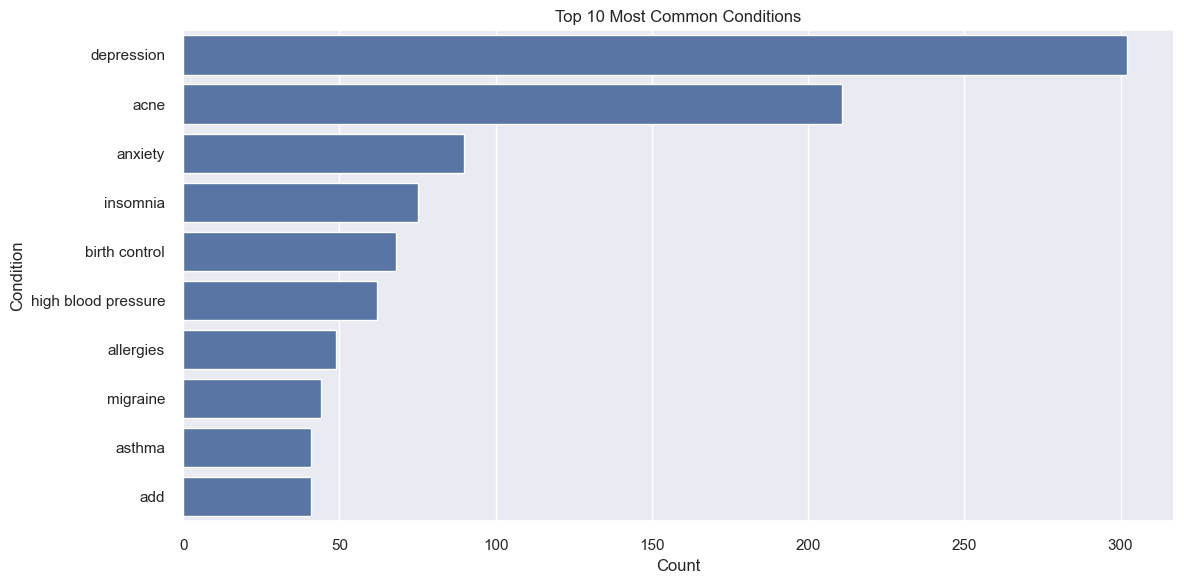

In [22]:
plt.figure(figsize=(12, 6))
condition_counts = df_combined['condition'].value_counts().head(10)
sns.barplot(x=condition_counts.values, y=condition_counts.index)
plt.title('Top 10 Most Common Conditions')
plt.xlabel('Count')
plt.ylabel('Condition')
plt.tight_layout()
plt.show()

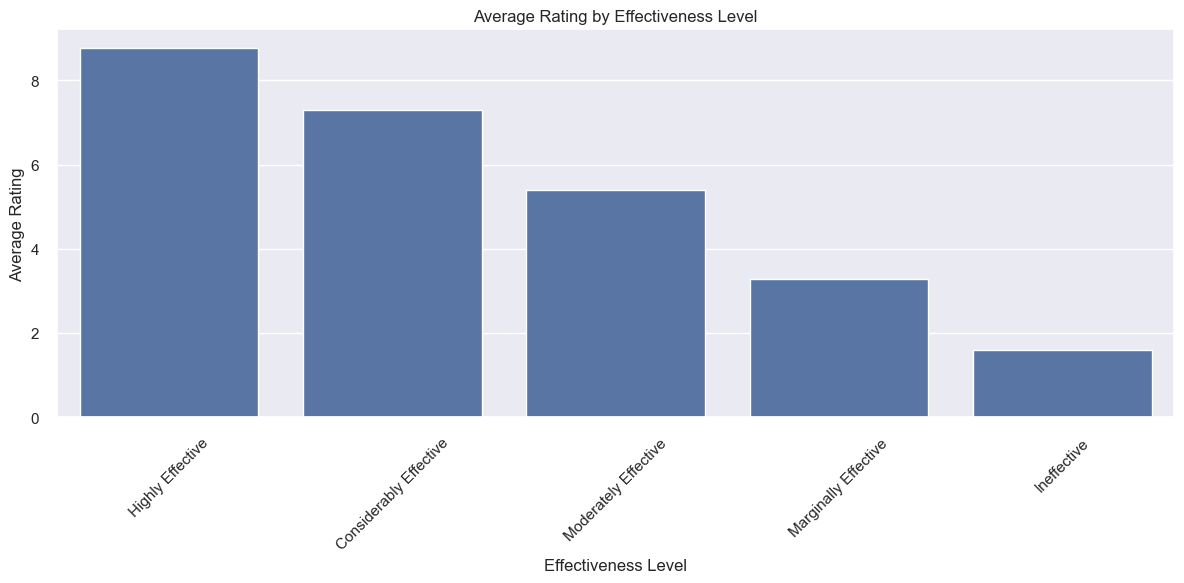

In [23]:
plt.figure(figsize=(12, 6))
avg_rating_effectiveness = df_combined.groupby('effectiveness')['rating'].mean().sort_values(ascending=False)
sns.barplot(x=avg_rating_effectiveness.index, y=avg_rating_effectiveness.values)
plt.xticks(rotation=45)
plt.title('Average Rating by Effectiveness Level')
plt.xlabel('Effectiveness Level')
plt.ylabel('Average Rating')
plt.tight_layout()
plt.show()

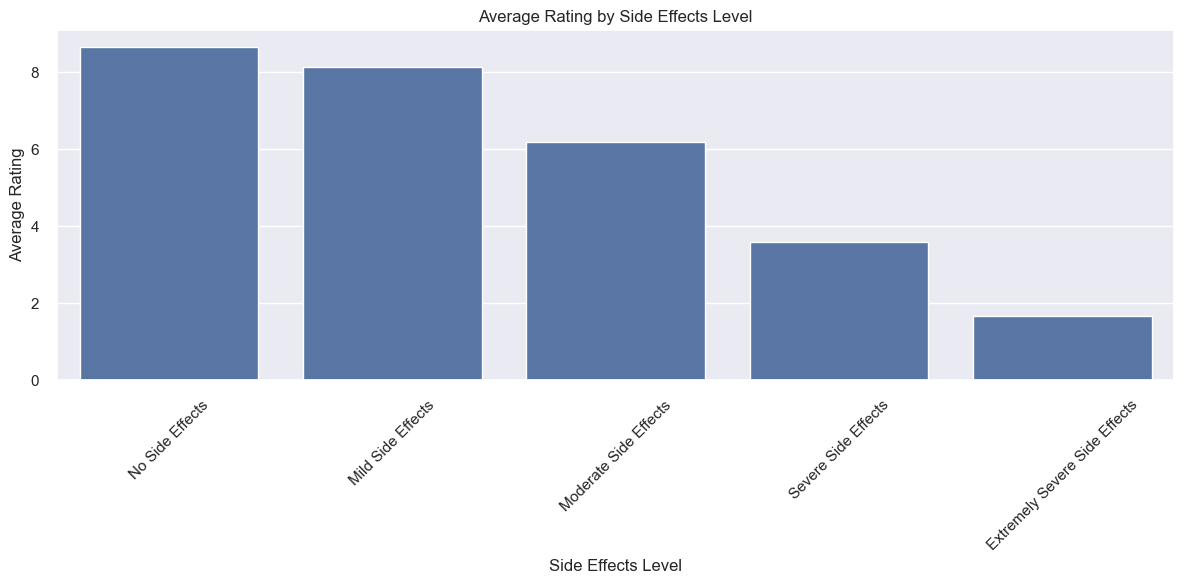

In [24]:
plt.figure(figsize=(12, 6))
avg_rating_side_effects = df_combined.groupby('sideEffects')['rating'].mean().sort_values(ascending=False)
sns.barplot(x=avg_rating_side_effects.index, y=avg_rating_side_effects.values)
plt.xticks(rotation=45)
plt.title('Average Rating by Side Effects Level')
plt.xlabel('Side Effects Level')
plt.ylabel('Average Rating')
plt.tight_layout()
plt.show()

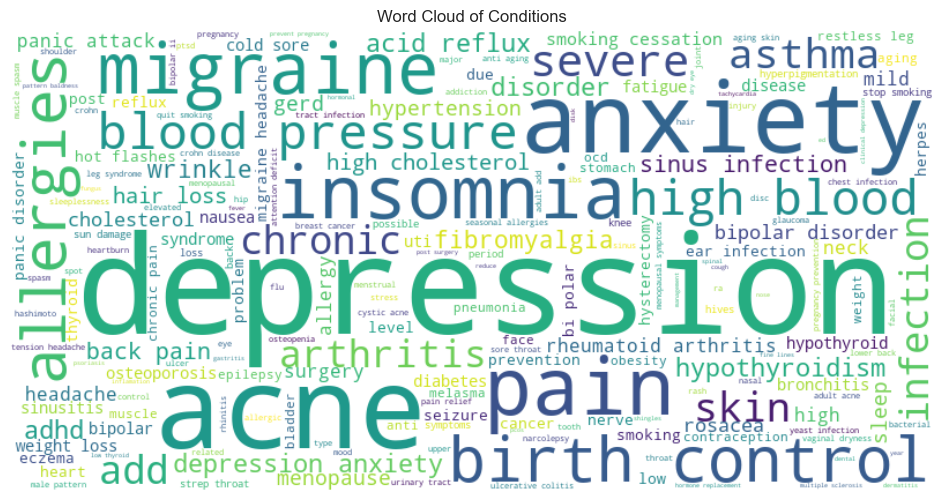

In [25]:
plt.figure(figsize=(12, 6))
text = ' '.join(df_combined['condition'].astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Conditions')
plt.show()

In [26]:
print("\nSummary Statistics for Ratings:")
print(df_combined['rating'].describe())


Summary Statistics for Ratings:
count    4143.000000
mean        6.946416
std         2.948868
min         1.000000
25%         5.000000
50%         8.000000
75%         9.000000
max        10.000000
Name: rating, dtype: float64


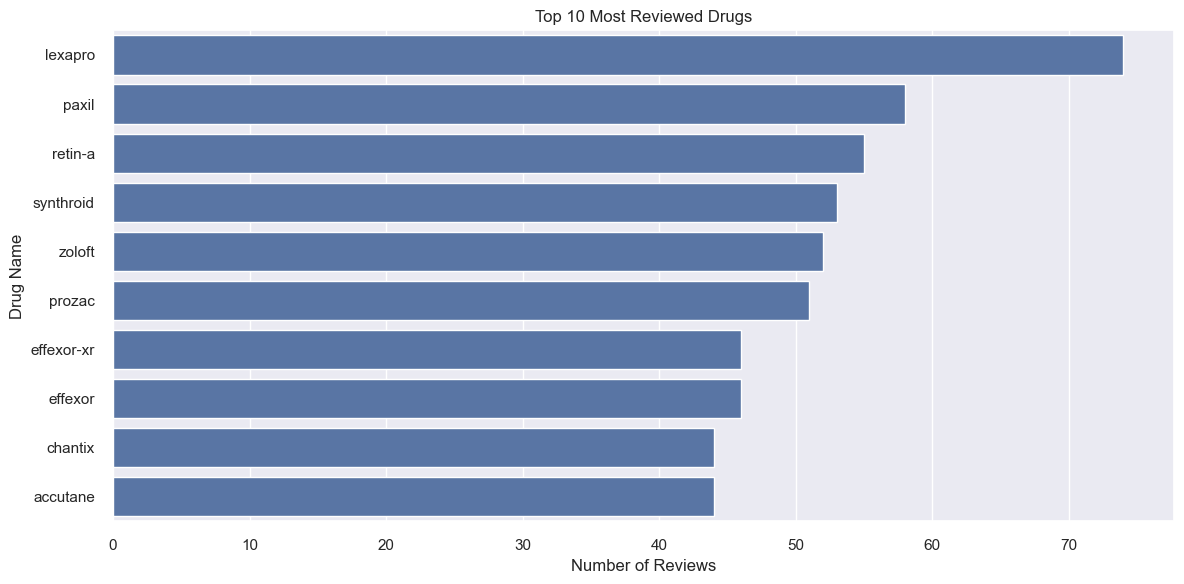

In [27]:
plt.figure(figsize=(12, 6))
drug_counts = df_combined['urlDrugName'].value_counts().head(10)
sns.barplot(x=drug_counts.values, y=drug_counts.index)
plt.title('Top 10 Most Reviewed Drugs')
plt.xlabel('Number of Reviews')
plt.ylabel('Drug Name')
plt.tight_layout()
plt.show()

In [28]:
print("\nMissing Values:\n", df_combined.isnull().sum())


Missing Values:
 Unnamed: 0            0
urlDrugName           0
rating                0
effectiveness         0
sideEffects           0
condition             1
benefitsReview       23
sideEffectsReview    98
commentsReview       13
dtype: int64


Missing Values Analysis:
                   Missing Values  Percentage
sideEffectsReview              98    2.365436
benefitsReview                 23    0.555153
commentsReview                 13    0.313782
condition                       1    0.024137
Unnamed: 0                      0    0.000000
sideEffects                     0    0.000000
effectiveness                   0    0.000000
rating                          0    0.000000
urlDrugName                     0    0.000000


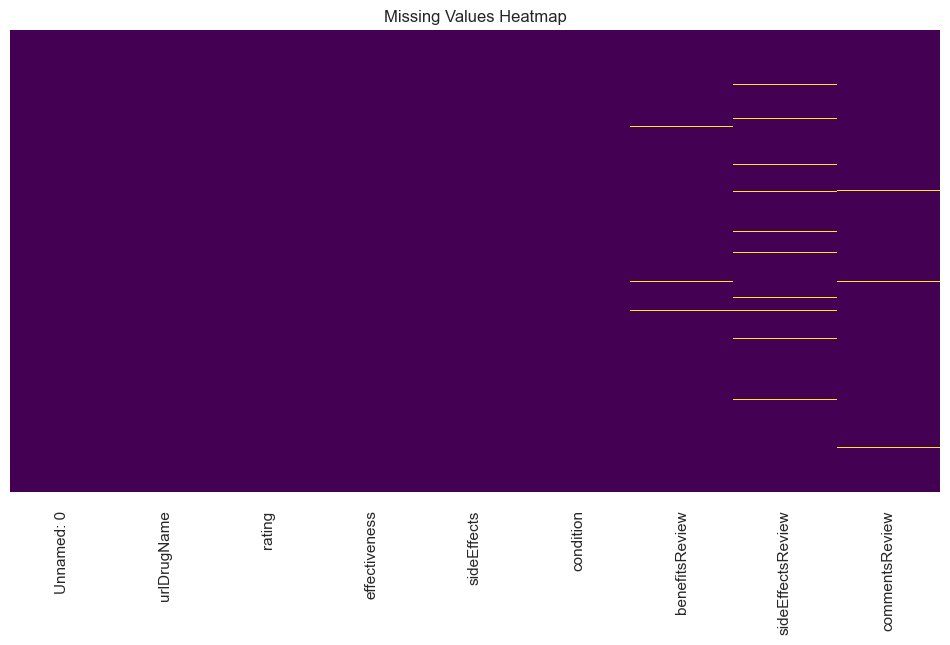

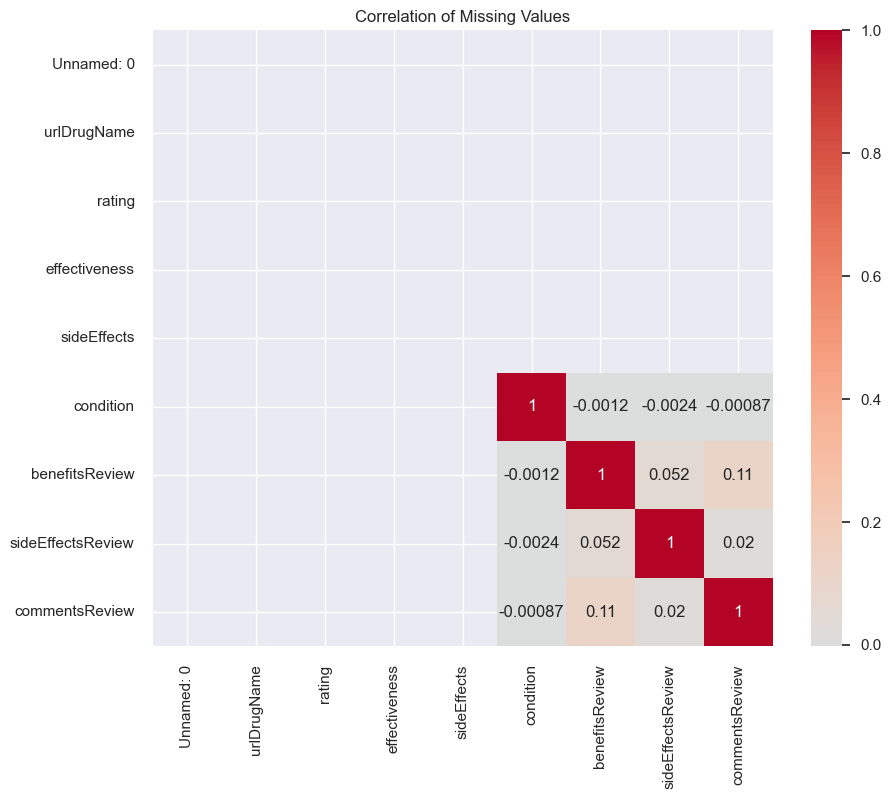

In [29]:
# 1. Check missing values in each column
missing_values = df_combined.isnull().sum()
missing_percentages = (missing_values / len(df_combined)) * 100

# Create a DataFrame with missing value information
missing_info = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentages
})

# Sort by percentage of missing values
missing_info = missing_info.sort_values('Percentage', ascending=False)

# Display missing value information
print("Missing Values Analysis:")
print(missing_info)

# 2. Visualize missing values
plt.figure(figsize=(12, 6))
sns.heatmap(df_combined.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

# 3. Check for patterns in missing values
# For example, if a drug has missing side effects, does it also have missing benefits?
correlation_matrix = df_combined.isnull().corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation of Missing Values')
plt.show()

In [30]:
# Check for duplicate rows
duplicates = df_combined.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Check for duplicates in specific columns
duplicate_drugs = df_combined.duplicated(subset=['urlDrugName', 'condition']).sum()
print(f"Number of duplicate drug-condition combinations: {duplicate_drugs}")

Number of duplicate rows: 0
Number of duplicate drug-condition combinations: 1487


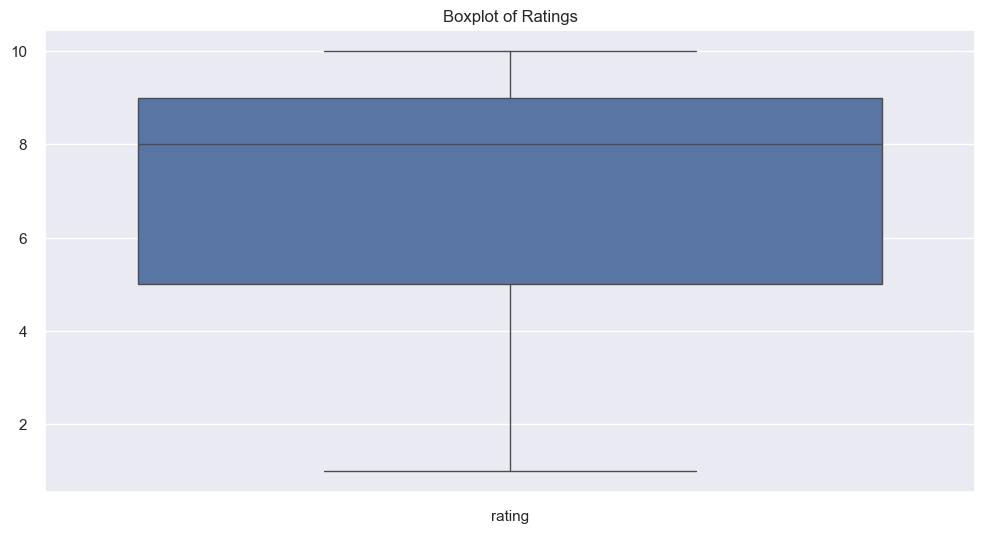

Rating outliers are values below -1.0 or above 15.0


In [31]:
# Create boxplots for numerical columns
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_combined[['rating']])
plt.title('Boxplot of Ratings')
plt.show()

# Calculate IQR for ratings
Q1 = df_combined['rating'].quantile(0.25)
Q3 = df_combined['rating'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Rating outliers are values below {lower_bound} or above {upper_bound}")

In [32]:
# Create new features
df_combined['review_length'] = df_combined['benefitsReview'].str.len() + df_combined['sideEffectsReview'].str.len() + df_combined['commentsReview'].str.len()
df_combined['has_severe_side_effects'] = df_combined['sideEffects'].isin(['Severe Side Effects', 'Extremely Severe Side Effects']).astype(int)
df_combined['is_highly_effective'] = df_combined['effectiveness'] == 'Highly Effective'

# Display new features
print("\nNew Features Summary:")
print(df_combined[['review_length', 'has_severe_side_effects', 'is_highly_effective']].describe())


New Features Summary:
       review_length  has_severe_side_effects
count    4014.000000              4143.000000
mean      671.624315                 0.180063
std       432.280443                 0.384286
min        25.000000                 0.000000
25%       384.250000                 0.000000
50%       549.000000                 0.000000
75%       832.750000                 0.000000
max      4516.000000                 1.000000


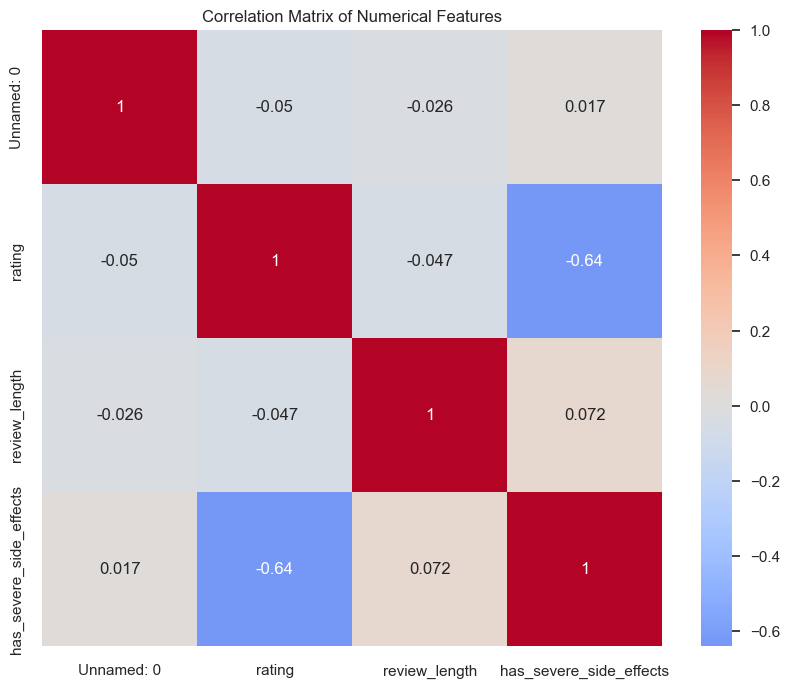

In [33]:
# Create correlation matrix for numerical columns
numerical_cols = df_combined.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = df_combined[numerical_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [34]:
# Check current state of the dataset
print("Current dataset shape:", df_combined.shape)
print("\nColumns in dataset:", df_combined.columns.tolist())
print("\nSample of new features:")
print(df_combined[['review_length', 'has_severe_side_effects', 'is_highly_effective']].head())

Current dataset shape: (4143, 12)

Columns in dataset: ['Unnamed: 0', 'urlDrugName', 'rating', 'effectiveness', 'sideEffects', 'condition', 'benefitsReview', 'sideEffectsReview', 'commentsReview', 'review_length', 'has_severe_side_effects', 'is_highly_effective']

Sample of new features:
   review_length  has_severe_side_effects  is_highly_effective
0          242.0                        0                False
1         2196.0                        0                 True
2         2477.0                        1                False
3          395.0                        0                 True
4          707.0                        0                 True


In [35]:
# Create copies of categorical columns for encoding
df_combined['effectiveness_encoded'] = df_combined['effectiveness'].map({
    'Ineffective': 1,
    'Marginally Effective': 2,
    'Moderately Effective': 3,
    'Considerably Effective': 4,
    'Highly Effective': 5
})

df_combined['side_effects_encoded'] = df_combined['sideEffects'].map({
    'No Side Effects': 1,
    'Mild Side Effects': 2,
    'Moderate Side Effects': 3,
    'Severe Side Effects': 4,
    'Extremely Severe Side Effects': 5
})

# Display the encoded columns
print("\nEncoded columns sample:")
print(df_combined[['effectiveness', 'effectiveness_encoded', 'sideEffects', 'side_effects_encoded']].head())


Encoded columns sample:
            effectiveness  effectiveness_encoded          sideEffects  \
0  Considerably Effective                      4    Mild Side Effects   
1        Highly Effective                      5    Mild Side Effects   
2    Moderately Effective                      3  Severe Side Effects   
3        Highly Effective                      5      No Side Effects   
4        Highly Effective                      5    Mild Side Effects   

   side_effects_encoded  
0                     2  
1                     2  
2                     4  
3                     1  
4                     2  


In [36]:
# Create a summary of key findings
print("\nKey Findings Summary:")
print("\n1. Dataset Overview:")
print(f"- Total number of reviews: {len(df_combined)}")
print(f"- Number of unique drugs: {df_combined['urlDrugName'].nunique()}")
print(f"- Number of unique conditions: {df_combined['condition'].nunique()}")

print("\n2. Rating Statistics:")
print(df_combined['rating'].describe())

print("\n3. Effectiveness Distribution:")
print(df_combined['effectiveness'].value_counts(normalize=True) * 100)

print("\n4. Side Effects Distribution:")
print(df_combined['sideEffects'].value_counts(normalize=True) * 100)

print("\n5. Most Common Conditions:")
print(df_combined['condition'].value_counts().head(10))


Key Findings Summary:

1. Dataset Overview:
- Total number of reviews: 4143
- Number of unique drugs: 541
- Number of unique conditions: 1807

2. Rating Statistics:
count    4143.000000
mean        6.946416
std         2.948868
min         1.000000
25%         5.000000
50%         8.000000
75%         9.000000
max        10.000000
Name: rating, dtype: float64

3. Effectiveness Distribution:
effectiveness
Highly Effective          42.022689
Considerably Effective    29.881728
Moderately Effective      13.806420
Ineffective                7.941105
Marginally Effective       6.348057
Name: proportion, dtype: float64

4. Side Effects Distribution:
sideEffects
Mild Side Effects                32.560946
No Side Effects                  28.916244
Moderate Side Effects            20.516534
Severe Side Effects              11.851315
Extremely Severe Side Effects     6.154960
Name: proportion, dtype: float64

5. Most Common Conditions:
condition
depression             302
acne                  

In [37]:
# Save the modified dataset
df_combined.to_csv('drug_reviews_processed.csv', index=False)